# Gibbs Sampling 
Gibbs Sampling updates each component of the state by sampling from its conditional distribution given other components
This method can eliminate or reduce the need for "tuning" of a proposal distribution.

Gibbs sampling is a MCMC algorithm that repeatedly samples from the conditional distribution of one variable of the target distribution p, given all other variables. It assumes we can compute conditional distributions of one variable conditioned on all of other variables and sample exactly from these distributions.

## Gibbs Sampling for Bayesian Linear Regression


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
plt.rcParams['figure.figsize'] = (10, 5)

## Step 1 : Calculate $\beta_0$ and  $\beta_1$

In [44]:
def sample_beta_0(y, x, beta_1, tau, mu_0, tau_0):
    precision = tau_0 + tau * len(y)
    mean = tau_0 * mu_0 + tau * np.sum(y - beta_1 * x)
    mean /= precision
    
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [46]:
def sample_beta_1(y, x, beta_0, tau, mu_1, tau_1):
    precision = tau_1 + tau * np.sum(x * x)
    mean = tau_1 * mu_1 + tau * np.sum( (y - beta_0) * x)
    mean /= precision
    
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [37]:
def sample_tau(y, x, beta_0, beta_1, alpha, beta):
    alpha_new = alpha + len(y) / 2
    resid = y - beta_0 - beta_1 * x
    beta_new = beta + np.sum(resid * resid) / 2
    return np.random.gamma(alpha_new, 1 / beta_new)

## Step 2: Sample Synthetic Data

Text(0, 0.5, 'y')

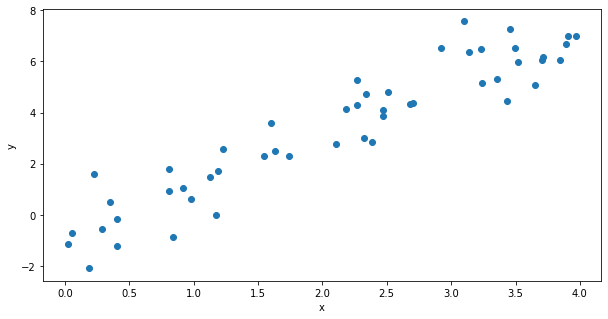

In [38]:
beta_0_true = -1
beta_1_true = 2
tau_true = 1

N = 50
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(beta_0_true + beta_1_true * x, 1 / np.sqrt(tau_true))


synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

## Step 3: Write Gibbs Sampler

In [39]:
## specify initial values
init = {"beta_0": 0,
        "beta_1": 0,
        "tau": 2}

## specify hyper parameters
hypers = {"mu_0": 0,
         "tau_0": 1,
         "mu_1": 0,
         "tau_1": 1,
         "alpha": 2,
         "beta": 1}

In [40]:
def gibbs(y, x, iters, init, hypers):
    
    beta_0 = init["beta_0"]
    beta_1 = init["beta_1"]
    tau = init["tau"]
    
    trace = np.zeros((iters, 3)) ## trace to store values of beta_0, beta_1, tau
    
    for it in range(iters):
        beta_0 = sample_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"])
        beta_1 = sample_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"])
        tau = sample_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"])
        trace[it,:] = np.array((beta_0, beta_1, tau))
        
    trace = pd.DataFrame(trace)
    trace.columns = ['beta_0', 'beta_1', 'tau']
        
    return trace

## Plotting Data

In [65]:

beta_0 = init["beta_0"]
beta_1 = init["beta_1"]
tau = init["tau"]
tau_sample, beta_0_sample, beta_1_sample = [],[],[]
    
trace = np.zeros((1000, 3)) ## trace to store values of beta_0, beta_1, tau
    
for it in range(1000):
    beta_0 = sample_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"])
    beta_0_sample.append(sample_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"]))
    
    beta_1 = sample_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"])
    beta_1_sample.append(sample_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"]))
    
    tau = sample_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"])
    tau_sample.append(sample_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"]))
    
    trace[it,:] = np.array((beta_0, beta_1, tau))

#print(tau_sample)

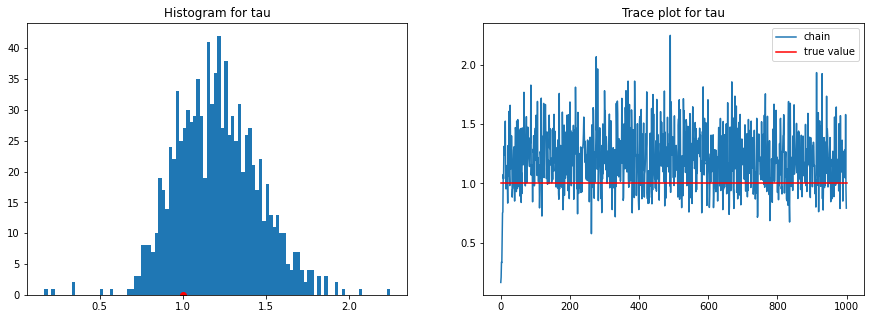

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(tau_sample, bins=100)
plt.scatter(tau_true, 0, c="r")
plt.title("Histogram for tau")
plt.subplot(1,2,2)
plt.plot(tau_sample, label="chain")
plt.plot([0, len(tau_sample)], [tau_true, tau_true], c="r", label="true value")
plt.title("Trace plot for tau")
plt.legend()
plt.show()

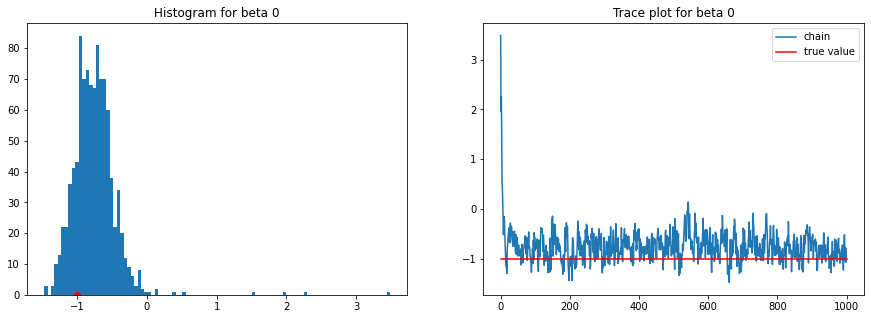

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(beta_0_sample, bins=100)
plt.scatter(beta_0_true, 0, c="r")
plt.title("Histogram for beta 0")
plt.subplot(1,2,2)
plt.plot(beta_0_sample, label="chain")
plt.plot([0, len(beta_0_sample)], [beta_0_true, beta_0_true], c="r", label="true value")
plt.title("Trace plot for beta 0")
plt.legend()
plt.show()

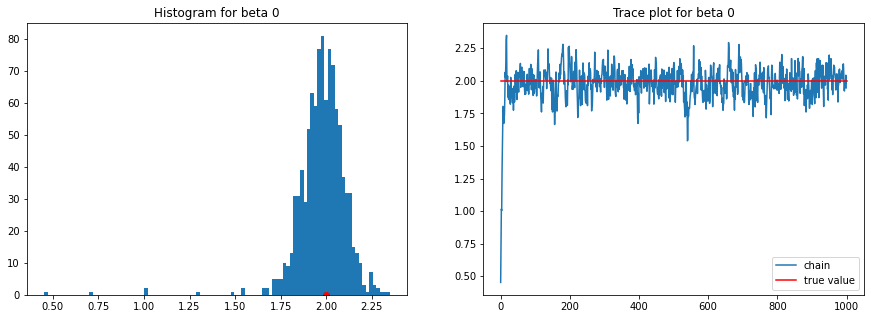

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(beta_1_sample, bins=100)
plt.scatter(beta_1_true, 0, c="r")
plt.title("Histogram for beta 0")
plt.subplot(1,2,2)
plt.plot(beta_1_sample, label="chain")
plt.plot([0, len(beta_1_sample)], [beta_1_true, beta_1_true], c="r", label="true value")
plt.title("Trace plot for beta 0")
plt.legend()
plt.show()

Text(0, 0.5, 'Parameter value')

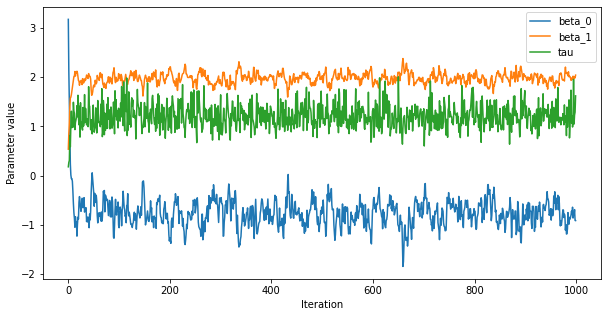

In [41]:
iters = 1000
trace = gibbs(y, x, iters, init, hypers)

traceplot = trace.plot()
traceplot.set_xlabel("Iteration")
traceplot.set_ylabel("Parameter value")



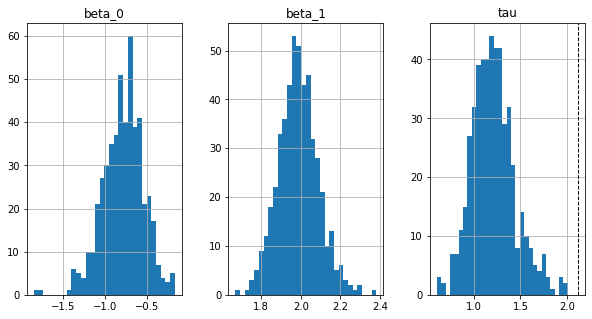

In [42]:
trace_burnt = trace[500:999]
hist_plot = trace_burnt.hist(bins = 30, layout = (1,3))
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

In [43]:
print(trace_burnt.median())
print(trace_burnt.mean())
print(trace_burnt.std())

beta_0   -0.768747
beta_1    1.984921
tau       1.191289
dtype: float64
beta_0   -0.780998
beta_1    1.987043
tau       1.207094
dtype: float64
beta_0    0.243732
beta_1    0.101059
tau       0.231644
dtype: float64


## Gibbs Sampling for Multivarative Linear Regression


In [ ]:
# Sample data from model